In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#tablonun okunması
df=pd.read_csv('C:/Users/usr7326/Desktop/python çalışma/movie inceleme/IMDB-Movie-Data.csv')
df

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [3]:
def data_inceleme(df):
    print('dateset columns: \n')
    print(df.columns)
    print('-'*10)
    print('data-type of each column: \n')
    print(df.dtypes)
    print('-'*10)
    print('missing rows in each column: \n')
    c=df.isnull().sum()
    print(c[c>0])
data_inceleme(df)

dateset columns: 

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')
----------
data-type of each column: 

Rank                    int64
Title                  object
Genre                  object
Description            object
Director               object
Actors                 object
Year                    int64
Runtime (Minutes)       int64
Rating                float64
Votes                   int64
Revenue (Millions)    float64
Metascore             float64
dtype: object
----------
missing rows in each column: 

Revenue (Millions)    128
Metascore              64
dtype: int64


In [4]:
# veri temizleme
#dublica kayıt 
dups=df.duplicated(['Title','Genre','Director'])
df[dups]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [21]:
#rank kolonunu silme

df=df.drop(['Rank','Description'],axis=1)


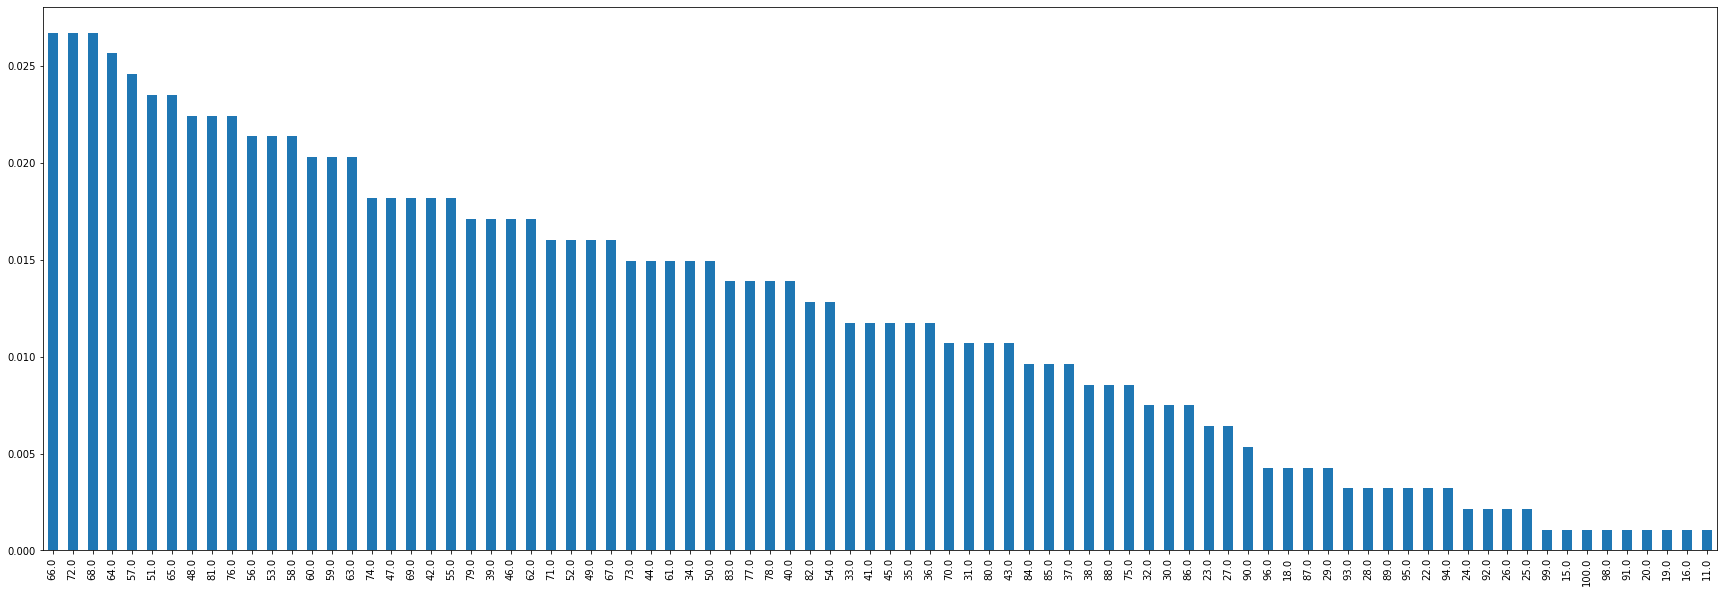

In [6]:
plt.figure(figsize=(30,10))
df['Metascore'].value_counts(normalize=True).plot.bar()

In [7]:
#Metascore kolonunu random doldurma
max=df['Metascore'].max()
min=df['Metascore'].min()
is_null=df['Metascore'].isnull().sum()
rand_metascore=np.random.randint(min,max,size=is_null)
copy_metascore=df['Metascore'].copy()
copy_metascore[np.isnan(copy_metascore)]=rand_metascore
df['Metascore']=copy_metascore.astype(int)

In [8]:
is_null=df['Metascore'].isnull().sum()
is_null

0

In [9]:
#Revenue kolonundaki boşları 0 ile doldurma
df['Revenue (Millions)']=df['Revenue (Millions)'].replace(np.nan,0)

In [14]:
#gelir kolonunu aralıklara ayırma
df.loc[(df['Revenue (Millions)'] >=0)&(df['Revenue (Millions)'] <= 30), 'Revenue']=0
df.loc[(df['Revenue (Millions)'] >30 )&(df['Revenue (Millions)'] <= 100), 'Revenue']=1
df.loc[(df['Revenue (Millions)'] >100)&(df['Revenue (Millions)'] <=200 ), 'Revenue']=2
df.loc[(df['Revenue (Millions)'] >200)&(df['Revenue (Millions)'] <= 400), 'Revenue']=3
df.loc[(df['Revenue (Millions)'] >400 )&(df['Revenue (Millions)'] <= 700), 'Revenue']=4
df.loc[(df['Revenue (Millions)'] >700)&(df['Revenue (Millions)'] <=950 ), 'Revenue']=5
df=df.drop('Revenue (Millions)',axis=1)

In [11]:
#Rating kolonunu aralıklara ayırma
df.loc[(df['Rating'] >=0)&(df['Rating'] <= 4), 'Rating1']=0
df.loc[(df['Rating'] >4)&(df['Rating'] <= 5), 'Rating1']=1
df.loc[(df['Rating'] >5)&(df['Rating'] <= 6), 'Rating1']=2
df.loc[(df['Rating'] >6)&(df['Rating'] <= 7), 'Rating1']=3
df.loc[(df['Rating'] >7)&(df['Rating'] <= 8), 'Rating1']=4
df.loc[(df['Rating'] >8)&(df['Rating'] <= 10), 'Rating1']=5

In [12]:
#Oy kolonunu aralıklara ayırma
df.loc[(df['Votes'] >=0)&(df['Votes'] <= 1000), 'Votes1']=0
df.loc[(df['Votes'] >1000)&(df['Votes'] <= 10000), 'Votes1']=1
df.loc[(df['Votes'] >10000)&(df['Votes'] <=50000 ), 'Votes1']=2
df.loc[(df['Votes'] >50000)&(df['Votes'] <=200000 ), 'Votes1']=3
df.loc[(df['Votes'] >200000)&(df['Votes'] <= 1500000), 'Votes1']=4
df.loc[(df['Votes'] >1500000), 'Votes1']=5


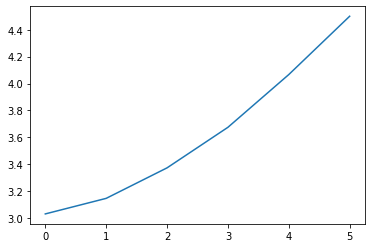

In [17]:
plt.plot(df.groupby('Revenue')['Rating1'].mean())

In [18]:
#Genre kolonundan ilk tarafı alma
import re
date_lst=[]
for i in df['Genre'].values:
    str1=re.findall('(^[a-zA-Z]+)',i)
    date='{}'.format(str1[0])
    date_lst.append(date)

df['Genre2']=date_lst

In [22]:
#Aktörleri sayma
def counter(Actors):
    if Actors==0:
        return 0
    else:
        lst=Actors.split(', ')
        length=len(lst)
        return length
df['Count Actors']=df['Actors'].apply(counter)

In [35]:
df

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Metascore,Revenue,Rating1,Votes1,Genre2,Count Actors
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,76,3.0,5.0,4.0,Action,4
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,65,2.0,3.0,4.0,Adventure,4
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,62,2.0,4.0,3.0,Horror,4
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,59,3.0,4.0,3.0,Animation,3
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,40,3.0,3.0,4.0,Action,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,45,0.0,3.0,2.0,Crime,4
996,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,46,0.0,2.0,3.0,Horror,4
997,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,50,1.0,3.0,3.0,Drama,4
998,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,22,0.0,2.0,1.0,Adventure,3


In [40]:
#Türlere göre oyların ve ratinglerin ortalamalarını alma

df1=df.groupby(['Genre2'],as_index=False)['Rating1','Votes1','Revenue'].mean()
df1


,Genre2,Rating1,Votes1,Revenue
0,Action,3.037543,3.235495,1.375427
1,Adventure,3.360000,3.146667,1.306667
2,Animation,3.816327,3.122449,2.081633
3,Biography,3.750000,2.750000,0.718750
4,Comedy,2.960000,2.685714,0.691429
5,Crime,3.309859,2.605634,0.464789
6,Drama,3.435897,2.517949,0.400000
7,Fantasy,2.250000,2.500000,0.500000
8,Horror,2.347826,2.347826,0.500000
9,Mystery,3.538462,3.000000,0.846154


In [44]:
#değerleri yuvarlama
df1=df1.round(2)

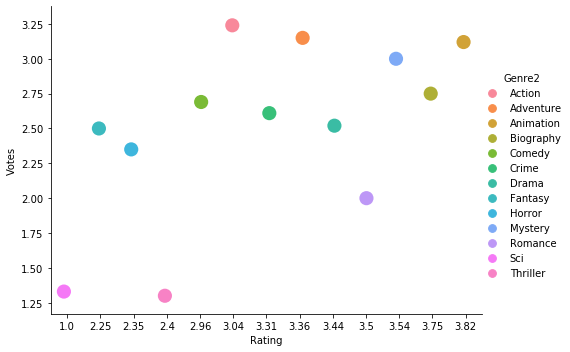

In [45]:
#Rating ve Votes 
a=sns.catplot(x="Rating1", y="Votes1", hue="Genre2", data=df1,sizes = (200, 300),height=5, aspect=1.5)
a.fig.set_figwidth(8)
a.fig.set_figheight(5)
a.set_axis_labels("Rating","Votes")

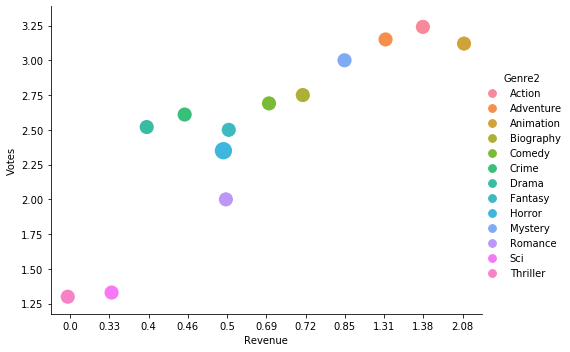

In [48]:
#Votes ve Revenue
a=sns.catplot(x="Revenue", y="Votes1", hue="Genre2", data=df1,sizes = (200, 300),height=5, aspect=1.5)
a.fig.set_figwidth(8)
a.fig.set_figheight(5)
a.set_axis_labels("Revenue","Votes")

In [49]:
#Score atama
df['Score']=(df['Rating1']*0.3)+(df['Votes1']*0.5)+(df['Revenue']*0.2)

Text(0.5, 1, 'Relation between movie dataset fields')

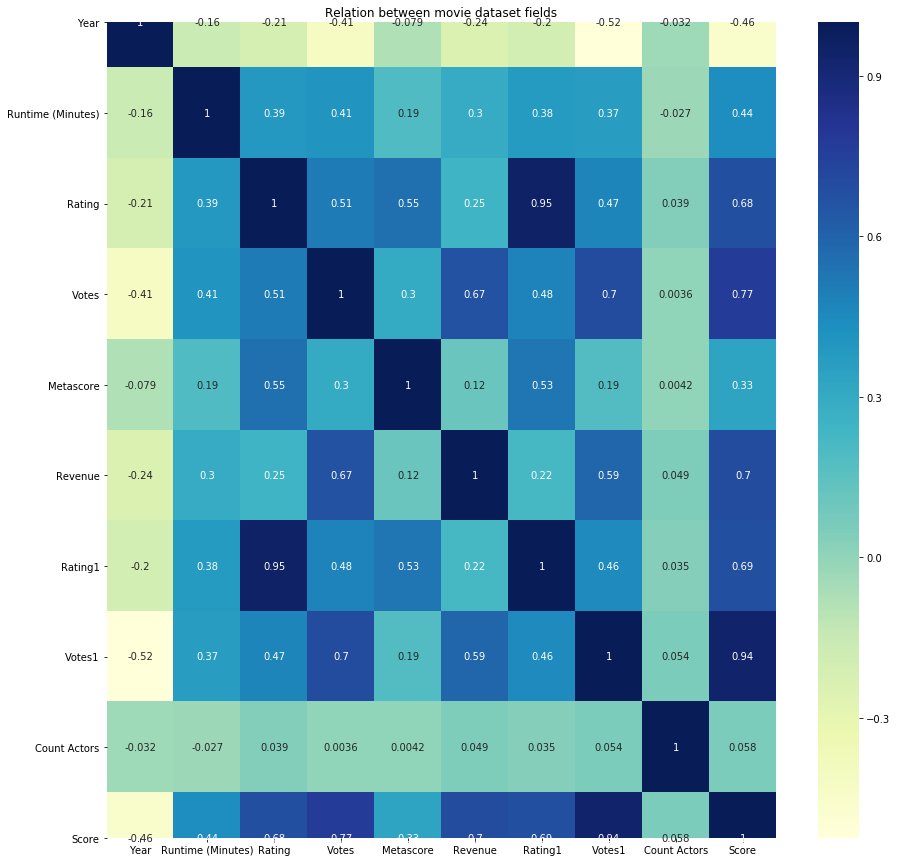

In [51]:
#Korelasyon grafiği ile verilerin incelenmesi
corr = df.corr()

figure = plt.figure(figsize=(15,15))

sns.heatmap(data=corr, annot=True,cmap='YlGnBu',xticklabels=True, yticklabels=True).set_title("Relation between movie dataset fields")

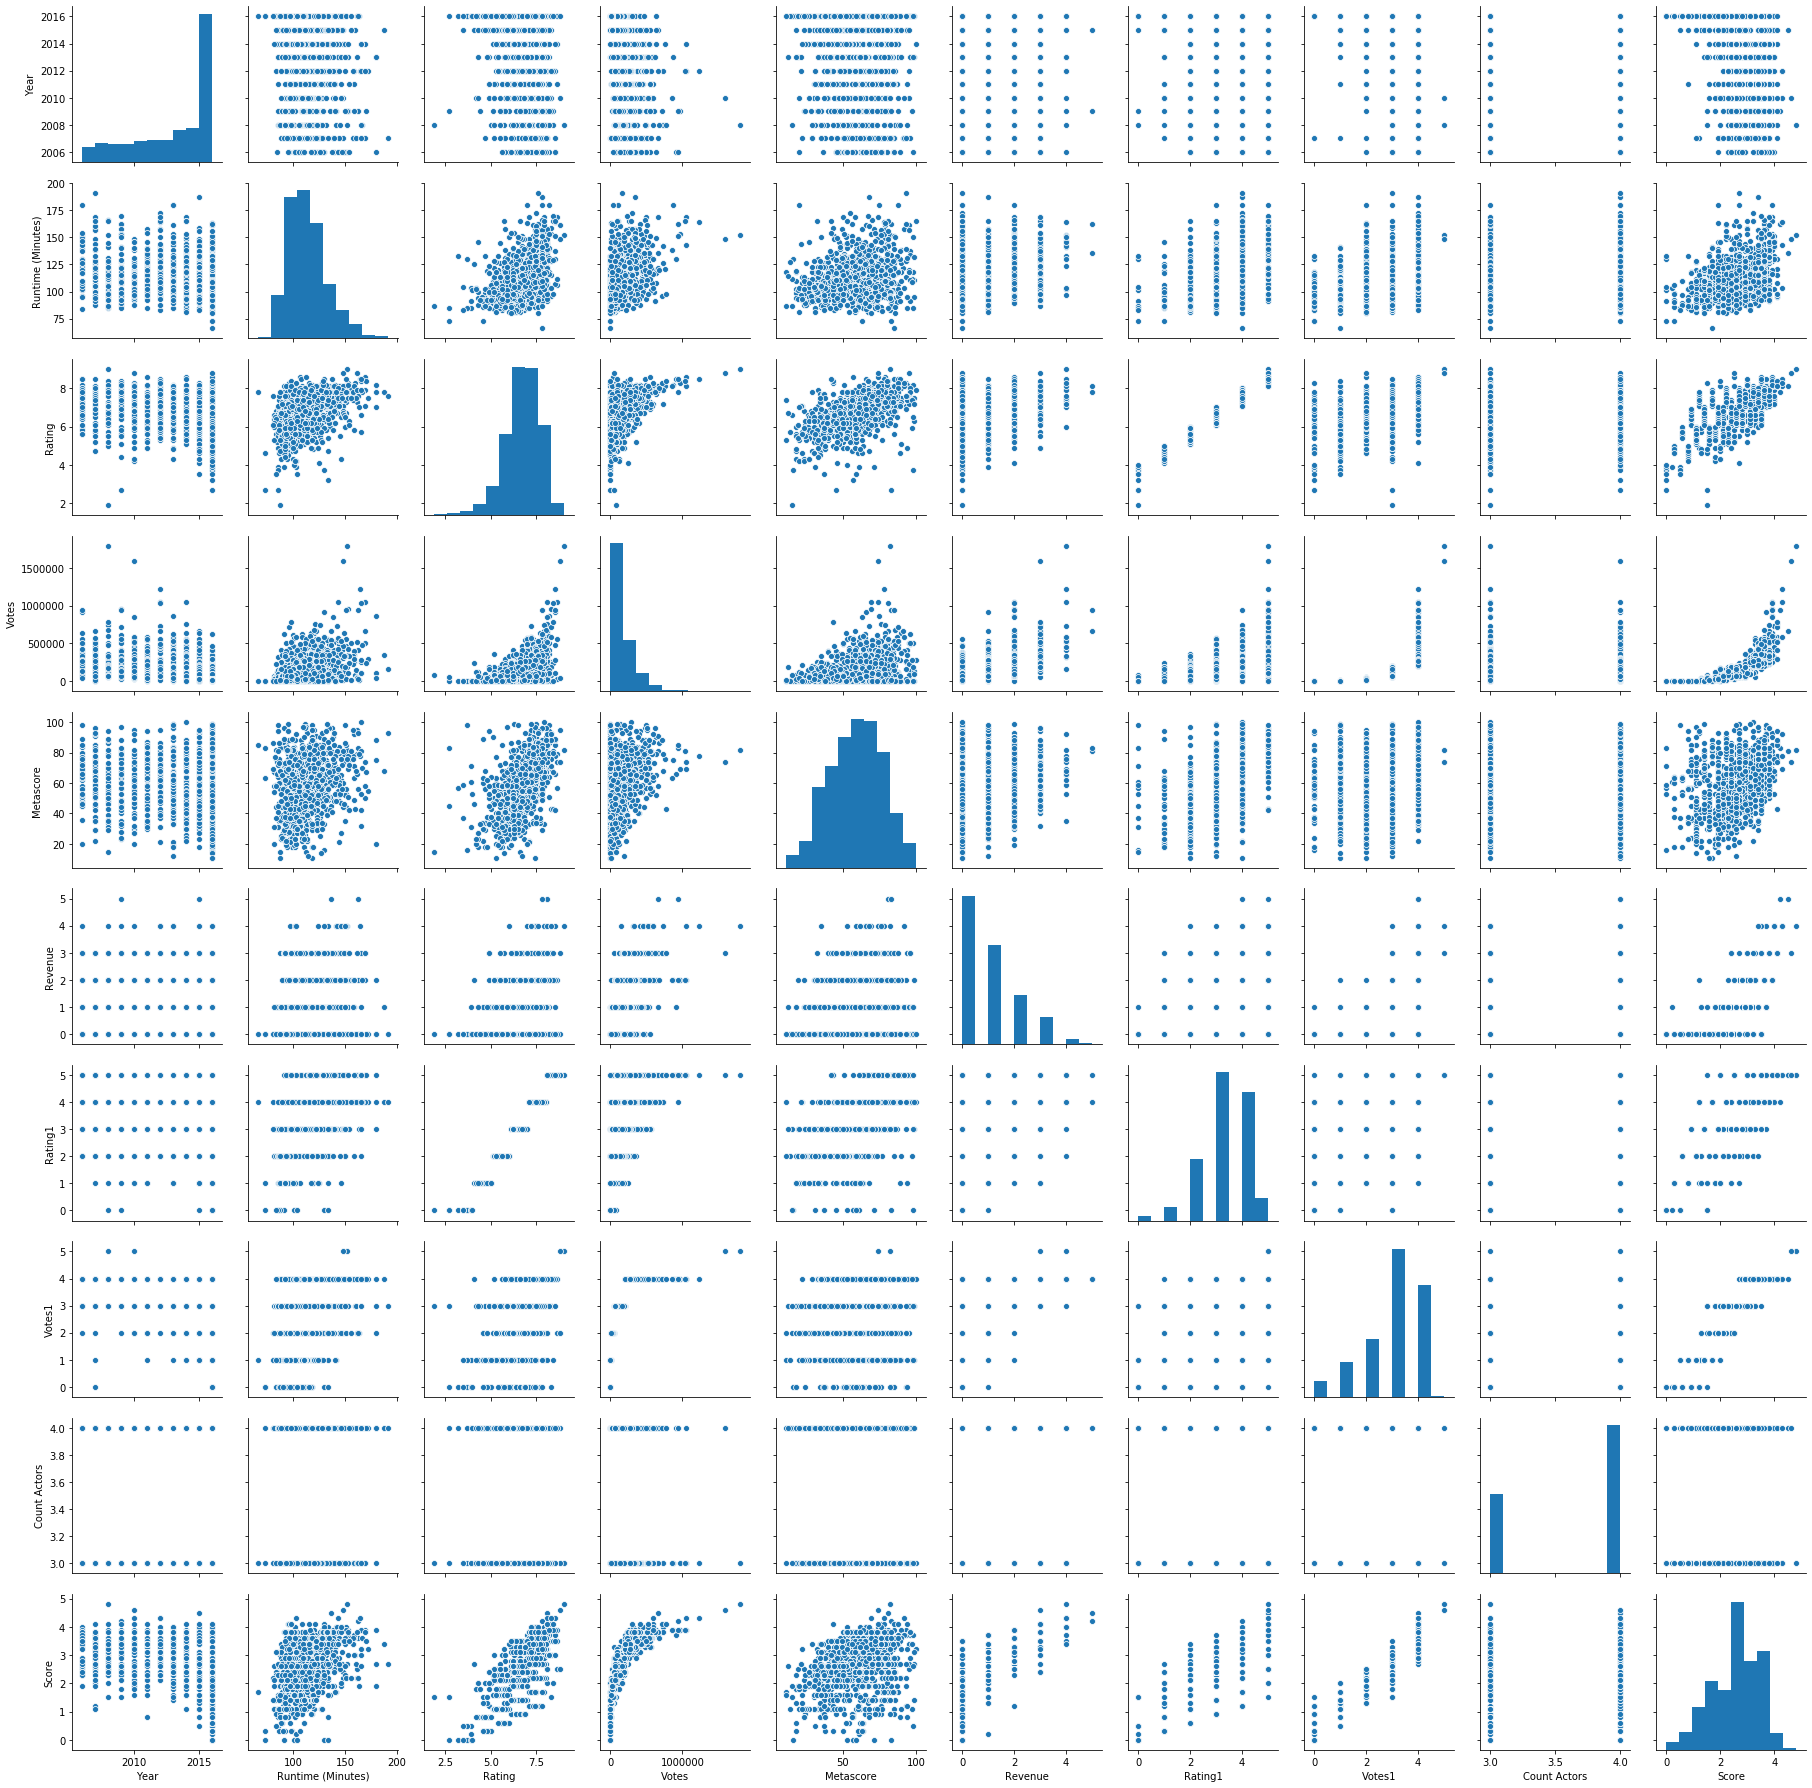

In [52]:
#Pairplot ile verilerin incelenmesi
sns.pairplot(df)

Text(0.5, 1.0, 'Genre with maximum Rating_Votes received')

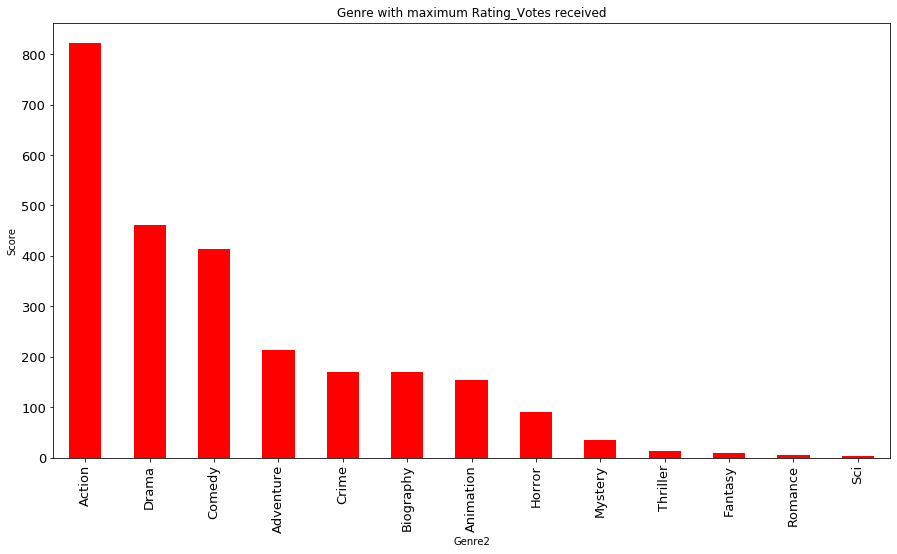

In [53]:
#en yüksek skora sahip film türleri
df.groupby(['Genre2'])['Score'].sum().sort_values(ascending=False)[:20].plot(kind='bar', figsize=(15,8), fontsize=13, color='red')
plt.ylabel('Score')
plt.title("Genre with maximum Rating_Votes received")

In [54]:
#Her bir kategoriye df tanımlanması
Action=df[df['Genre2']=='Action']
Drama=df[df['Genre2']=='Drama']
Comedy=df[df['Genre2']=='Comedy']
Adventure=df[df['Genre2']=='Adventure']
Crime=df[df['Genre2']=='Crime']
Animation=df[df['Genre2']=='Animation']
Biography=df[df['Genre2']=='Biography']
Horror=df[df['Genre2']=='Horror']
Mystery=df[df['Genre2']=='Mystery']
Fantasy=df[df['Genre2']=='Fantasy']
Thriller=df[df['Genre2']=='Thriller']
Romance=df[df['Genre2']=='Romance']

Text(0.5, 1.0, 'Action Highest Movies')

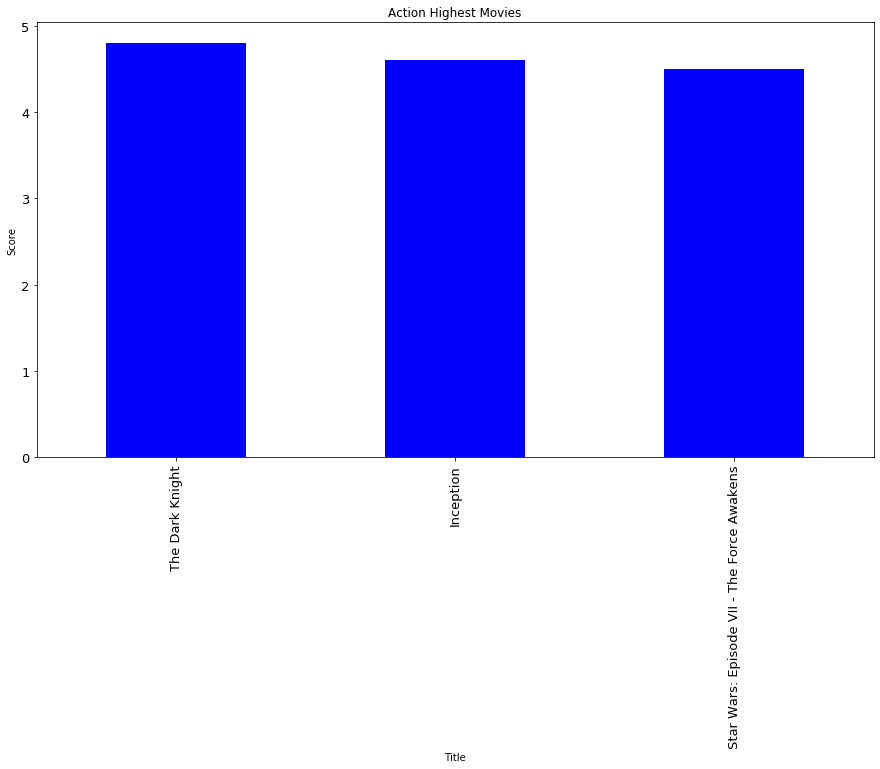

In [55]:
#Aksiyon için en iyi 3 film
Action.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Action Highest Movies")

Text(0.5, 1.0, 'Drama Highest Movies')

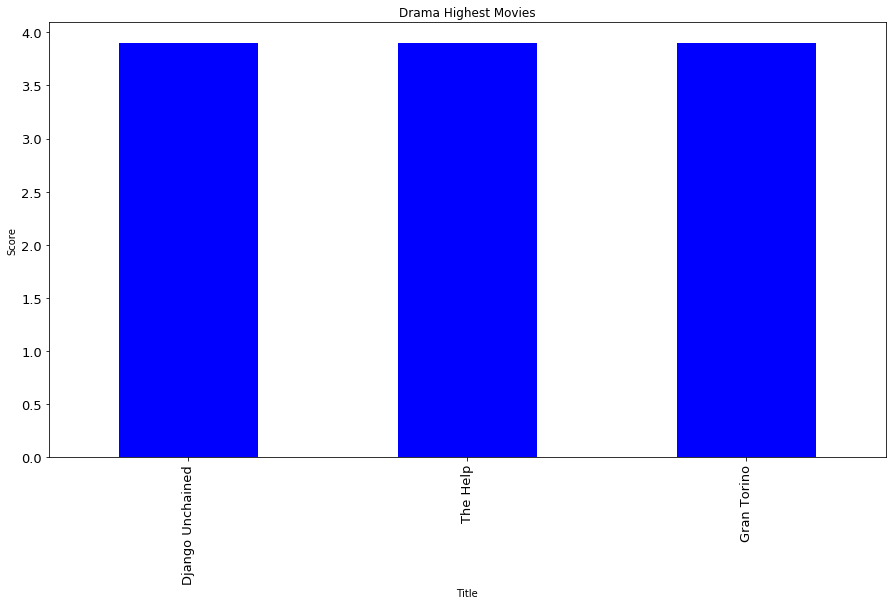

In [56]:
Drama.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Drama Highest Movies")

Text(0.5, 1.0, 'Comedy Highest Movies')

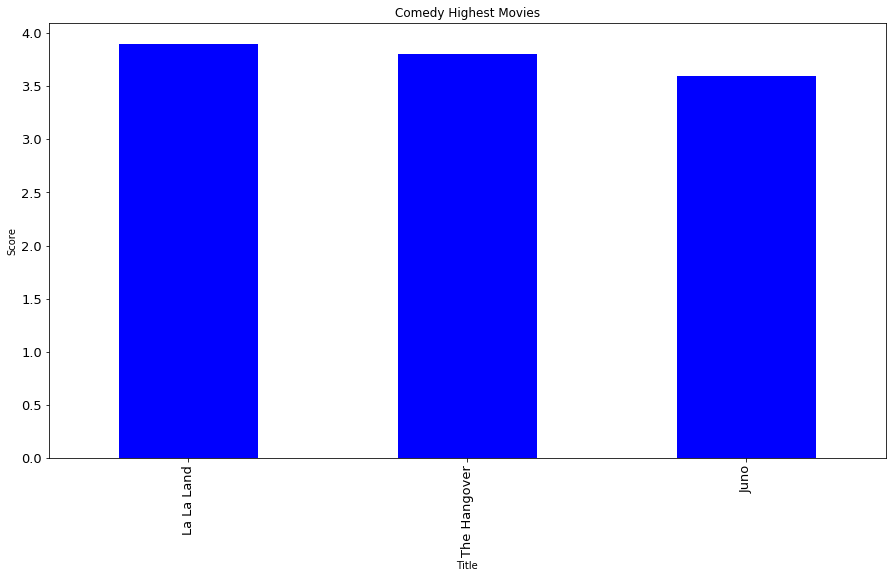

In [57]:
Comedy.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Comedy Highest Movies")

Text(0.5, 1.0, 'Adventure Highest Movies')

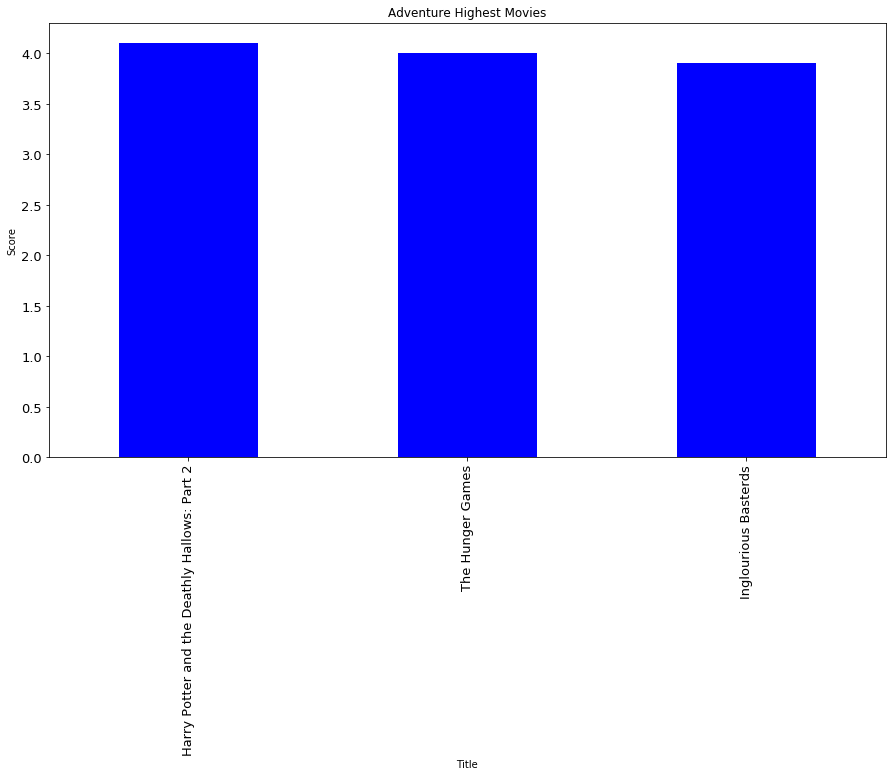

In [58]:
Adventure.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Adventure Highest Movies")

Text(0.5, 1.0, 'Crime Highest Movies')

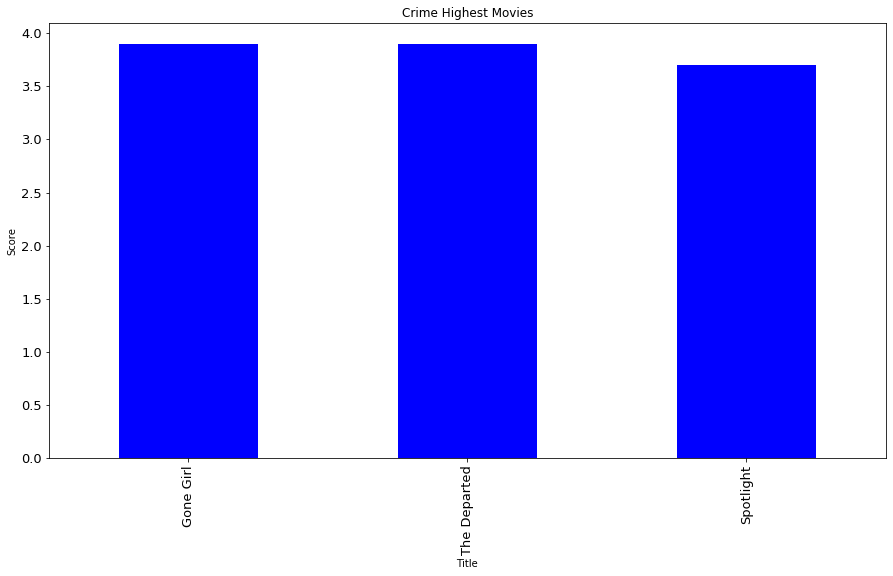

In [59]:
Crime.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Crime Highest Movies")

Text(0.5, 1.0, 'Animation Highest Movies')

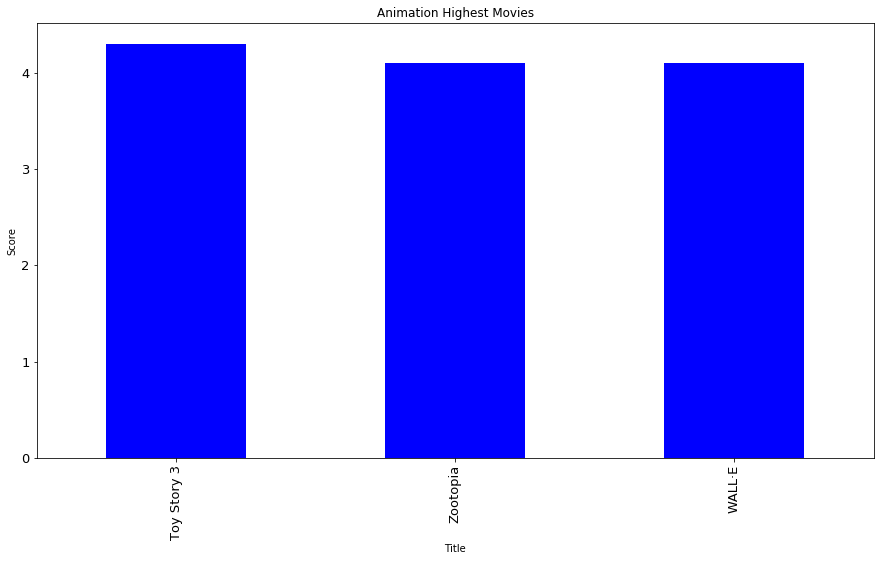

In [60]:
Animation.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Animation Highest Movies")

Text(0.5, 1.0, 'Biography Highest Movies')

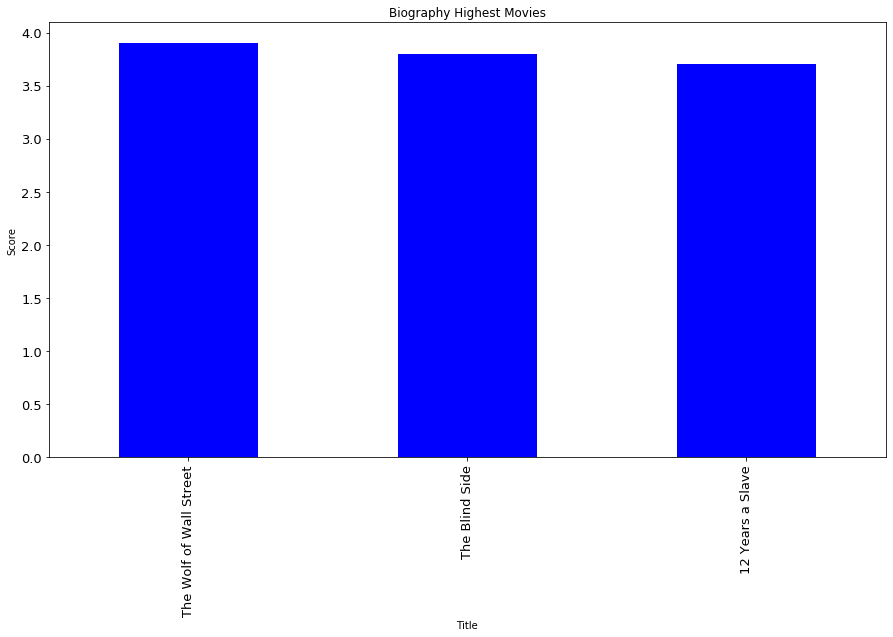

In [61]:
Biography.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Biography Highest Movies")

Text(0.5, 1.0, 'Horror Highest Movies')

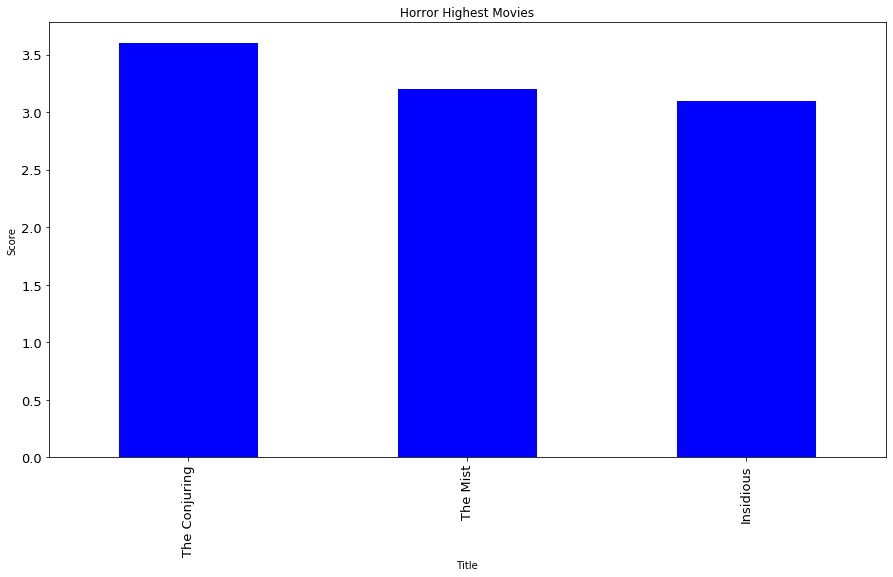

In [62]:
Horror.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Horror Highest Movies")

Text(0.5, 1.0, 'Mystery Highest Movies')

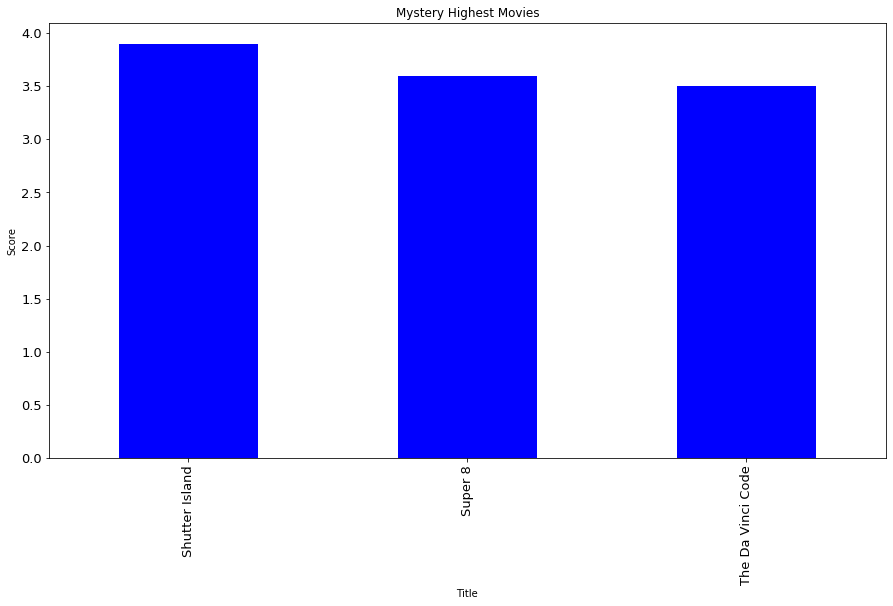

In [63]:
Mystery.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Mystery Highest Movies")

Text(0.5, 1.0, 'Fantasy Highest Movies')

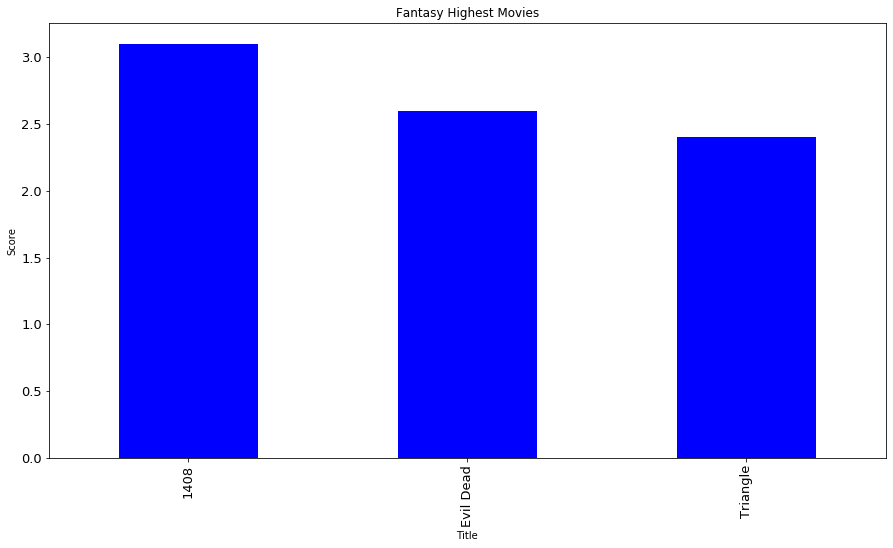

In [64]:
Fantasy.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Fantasy Highest Movies")

Text(0.5, 1.0, 'Thriller Highest Movies')

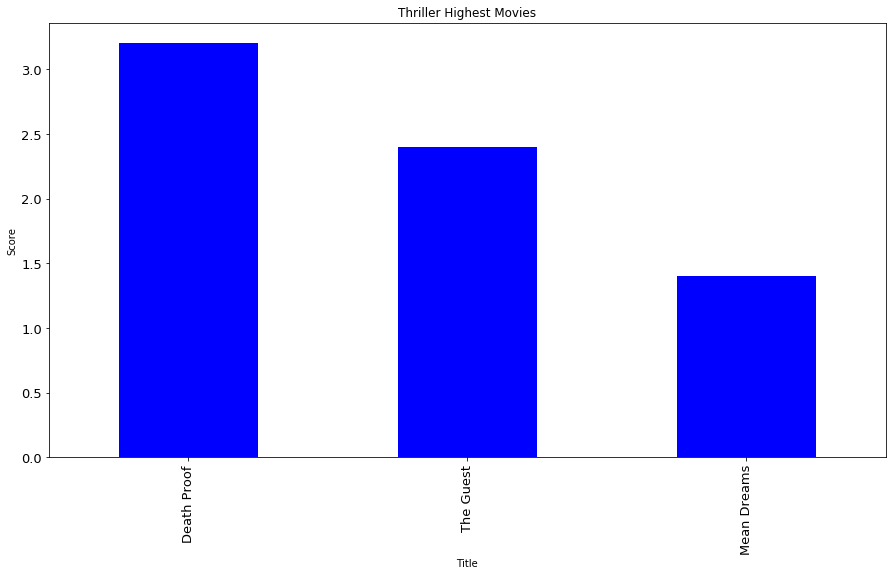

In [65]:
Thriller.groupby(['Title'])['Score'].mean().sort_values(ascending=False)[:3].plot(kind='bar', figsize=(15,8), fontsize=13, color='blue')
plt.ylabel('Score')
plt.title("Thriller Highest Movies")